<a href="https://colab.research.google.com/github/Hyun-ho-Lee/Kaggle-and-Project/blob/master/Dacon_project%2008%2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os 
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drvie')

Drive already mounted at /content/drvie; to attempt to forcibly remount, call drive.mount("/content/drvie", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
dlvr_call=pd.read_csv('/content/drvie/MyDrive/dlvr_call.csv',encoding='utf-8')
popl=pd.read_csv('/content/drvie/MyDrive/popl.csv',encoding='utf-8')

In [ ]:
dlvr_call['PROCESS_DT']=pd.to_datetime(dlvr_call['PROCESS_DT'])

In [ ]:
dlvr_call.info()
popl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4296271 entries, 0 to 4296270
Data columns (total 32 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   SN                         int64         
 1   PROCESS_DT                 datetime64[ns]
 2   DLVR_REQUST_ENTRPS_ID      object        
 3   DLVR_REQUST_STTUS_VALUE    int64         
 4   DLVR_RCEPT_ENTRPS_ID       object        
 5   DLVR_STORE_ID              object        
 6   DLVR_STORE_INDUTY_NM       object        
 7   DLVR_STORE_LEGALDONG_CODE  int64         
 8   DLVR_STORE_BRTC_NM         object        
 9   DLVR_STORE_SIGNGU_NM       object        
 10  DLVR_STORE_LEGALDONG_NM    object        
 11  DLVR_STORE_LI_NM           object        
 12  DLVR_STORE_ADSTRD_CODE     int64         
 13  DLVR_STORE_RDNMADR_CODE    object        
 14  DLVR_DSTN_LEGALDONG_CODE   int64         
 15  DLVR_DSTN_BRTC_NM          object        
 16  DLVR_DSTN_SIGNGU_NM        object   

In [ ]:
dlvr_call_2=dlvr_call[['PROCESS_DT','DLVR_STORE_INDUTY_NM','DLVR_AMOUNT']]

In [ ]:
dlvr_call_pivot=pd.pivot_table(data=dlvr_call_2, index=['PROCESS_DT'],
                       columns=['DLVR_STORE_INDUTY_NM'],aggfunc='count')

In [ ]:
dlvr_call_pivot

DLVR_AMOUNT                  ...                        
DLVR_STORE_INDUTY_NM         도시락  돈까스/일식  배달전문업체  ...      피자      한식       회
PROCESS_DT                                        ...                        
2019-12-01                  19.0   412.0   127.0  ...   672.0  1042.0   205.0
2019-12-02                 249.0   745.0   199.0  ...   750.0  1855.0   227.0
2019-12-03                 242.0   864.0   261.0  ...   901.0  2059.0   273.0
2019-12-04                 222.0   813.0   195.0  ...   924.0  1875.0   292.0
2019-12-05                 240.0   900.0   284.0  ...   980.0  2179.0   336.0
...                          ...     ...     ...  ...     ...     ...     ...
2020-05-27                 271.0  1306.0   900.0  ...  1012.0  3057.0   444.0
2020-05-28                 344.0  1321.0   976.0  ...  1074.0  3250.0   457.0
2020-05-29                 331.0  1501.0   920.0  ...  1203.0  3495.0   812.0
2020-05-30                 267.0  1658.0  1101.0  ...  1472.0  4486.0  1051.0
2020-05-31                 176.0  1604.0  1304.0  ...  1674.0  4684.0   751.0

[182 rows x 16 columns]

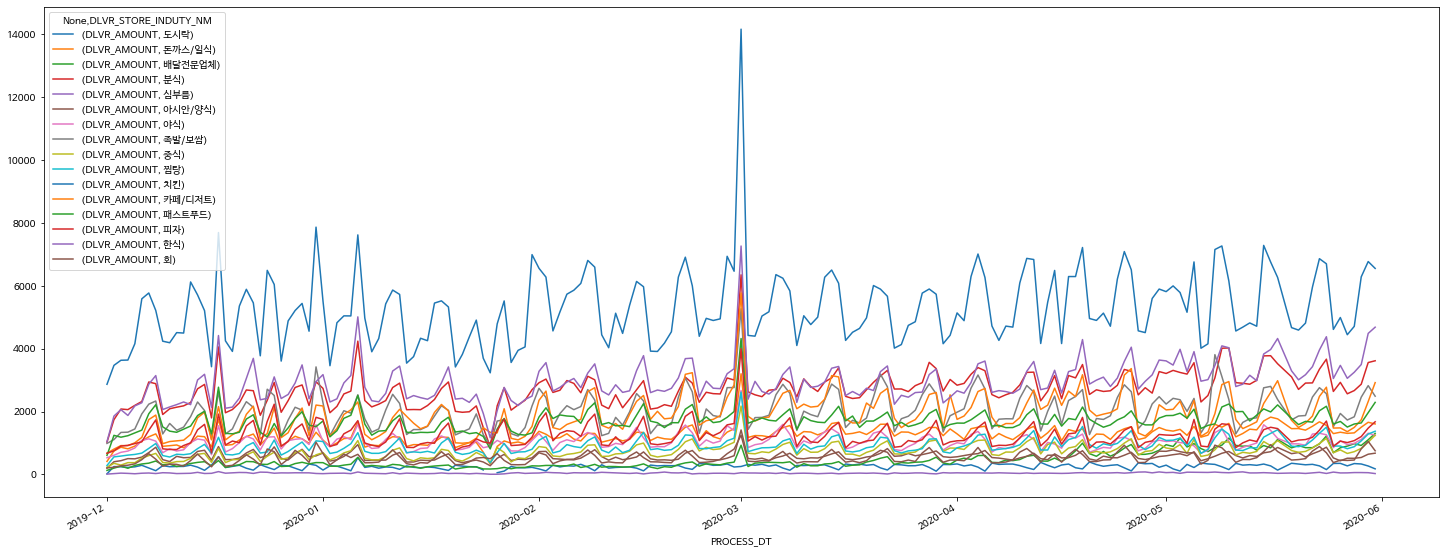

In [ ]:
dlvr_call_pivot.plot(figsize=(25, 10))

In [ ]:
dlvr_call['PROCESS_DT'].value_counts().sort_values(ascending=False)

2020-03-01    61702
2020-01-06    34342
2019-12-17    33496
2020-05-09    33269
2020-04-19    32800
              ...  
2019-12-04    15772
2019-12-16    15397
2019-12-02    14335
2020-01-25    12262
2019-12-01     9879
Name: PROCESS_DT, Length: 182, dtype: int64

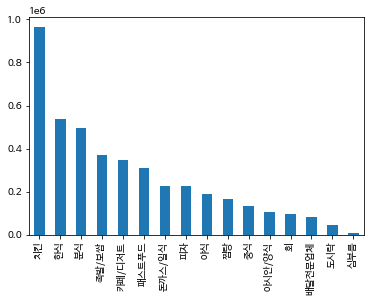

In [ ]:
dlvr_call['DLVR_STORE_INDUTY_NM'].value_counts().plot(kind='bar')

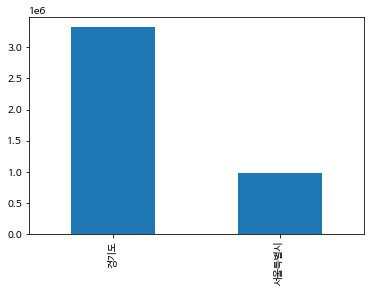

In [ ]:
dlvr_call['DLVR_STORE_BRTC_NM'].value_counts().plot(kind='bar')

In [ ]:
delivered = dlvr_call[dlvr_call['DLVR_COMPT_TIME'].str[:4].apply(lambda x : x in ['2019', '2020'])]

In [ ]:
delivered = delivered[delivered['DLVR_CARALC_TIME'].str[:4].apply(lambda x : x in ['2019', '2020'])]
delivered = delivered[delivered['DLVR_RECPT_TIME'].str[:4].apply(lambda x : x in ['2019', '2020'])]
delivered = delivered[delivered['DLVR_COMPT_TIME'].str[:4].apply(lambda x : x in ['2019', '2020'])]

delivered['DLVR_RCEPT_TIME'] = pd.to_datetime(delivered['DLVR_RCEPT_TIME'])
delivered['DLVR_CARALC_TIME'] = pd.to_datetime(delivered['DLVR_CARALC_TIME'])
delivered['DLVR_RECPT_TIME'] = pd.to_datetime(delivered['DLVR_RECPT_TIME'])
delivered['DLVR_COMPT_TIME'] = pd.to_datetime(delivered['DLVR_COMPT_TIME'])

delivered['DLVR_TOTAL_TIME'] = (delivered['DLVR_RECPT_TIME'] - delivered['DLVR_RCEPT_TIME']) #.apply(lambda x : x.total_seconds())

delivered.shape

(4212975, 33)

In [ ]:
delivered

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,DLVR_TOTAL_TIME
0,3486929,2019-12-01,C000101,1,C000101,S0021950,족발/보쌈,1156013200,서울특별시,영등포구,신길동,\N,1156066000,115603000023,1159010800,서울특별시,동작구,대방동,\N,1159066000,115904157098,D0006140,3300,200,18000,1,승인:KB국민카드,2019-12-01 20:47:52,2019-12-01 20:48:11,2019-12-01 20:55:33,2019-12-01 21:00:15,\N,0 days 00:07:41
1,3486930,2019-12-01,C000099,1,C000099,S0039210,치킨,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412854379205,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412853193037,D0005898,2900,0,21900,1,승인:현대카드사,2019-12-01 21:58:07,2019-12-01 22:01:06,2019-12-01 22:20:53,2019-12-01 22:26:01,\N,0 days 00:22:46
2,3486932,2019-12-01,C000029,1,C000043,S0036135,치킨,4115010100,경기도,의정부시,의정부동,\N,4115051000,411504343421,4115011100,경기도,의정부시,녹양동,\N,4115062000,411504343083,D0000864,3500,200,19500,2,NaN,2019-12-01 22:20:31,2019-12-01 22:37:45,2019-12-01 22:58:27,2019-12-01 22:58:32,\N,0 days 00:37:56
3,3486933,2019-12-01,C000105,1,C000105,S0039956,돈까스/일식,4128510400,경기도,고양시 일산동구,장항동,\N,4128559000,412854379097,4128510500,경기도,고양시 일산동구,마두동,\N,4128556000,412854379158,D0001526,3500,0,18000,2,NaN,2019-12-01 21:40:39,2019-12-01 21:48:41,2019-12-01 22:06:35,2019-12-01 22:17:57,\N,0 days 00:25:56
4,3486934,2019-12-01,C000028,1,C000043,S0003074,치킨,4115010900,경기도,의정부시,금오동,\N,4115058000,411504343342,4115010900,경기도,의정부시,금오동,\N,4115058000,411503181019,D0000986,3500,200,18000,3,NaN,2019-12-01 19:44:37,2019-12-01 19:48:07,2019-12-01 19:54:30,2019-12-01 20:00:22,\N,0 days 00:09:53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4296266,7750546,2020-03-31,C000237,1,C000237,S0021188,족발/보쌈,4121010200,경기도,광명시,철산동,\N,4121060000,4.12103E+11,4121010200,경기도,광명시,철산동,\N,4121059000,4.12103E+11,D0009705,3300,300,20900,2,NaN,2020-03-31 23:56:00,2020-03-31 23:56:00,2020-04-01 00:14:00,2020-04-01 00:18:00,\N,0 days 00:18:00
4296267,7750548,2020-03-31,C000104,1,C000102,S0021967,치킨,1156013300,서울특별시,영등포구,대림동,\N,1156070000,1.15603E+11,1162010200,서울특별시,관악구,신림동,\N,1162065500,1.16204E+11,D0002307,6300,200,26000,1,승인:신한카드,2020-03-31 23:55:00,2020-03-31 23:55:00,2020-04-01 00:17:00,2020-04-01 00:26:00,\N,0 days 00:22:00
4296268,7750550,2020-03-31,C000224,1,C000224,S0035329,분식,4127110400,경기도,안산시 상록구,본오동,\N,4127156000,4.12713E+11,4127310100,경기도,안산시 단원구,고잔동,\N,4127353500,4.12734E+11,D0009816,5500,200,17000,1,승인:롯데카드사,2020-03-31 23:58:00,2020-03-31 23:59:00,2020-04-01 00:18:00,2020-04-01 00:30:00,\N,0 days 00:20:00
4296269,7750552,2020-03-31,C000130,1,C000130,S0002286,족발/보쌈,4128112300,경기도,고양시 덕양구,화정동,\N,4128162200,4.12813E+11,4128112800,경기도,고양시 덕양구,행신동,\N,4128165500,4.12814E+11,D0002233,4000,300,35000,2,NaN,2020-03-31 23:56:00,2020-04-01 00:01:00,2020-04-01 00:16:00,2020-04-01 00:23:00,\N,0 days 00:20:00


In [ ]:
dlvr_call['PROCESS_month']= dlvr_call['PROCESS_DT'].dt.month
dlvr_call['PROCESS_month']

0          12
1          12
2          12
3          12
4          12
           ..
4296266     3
4296267     3
4296268     3
4296269     3
4296270     3
Name: PROCESS_month, Length: 4296271, dtype: int64

In [ ]:
dlvr_call

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,PROCESS_month
0,3486929,2019-12-01,C000101,1,C000101,S0021950,족발/보쌈,1156013200,서울특별시,영등포구,신길동,\N,1156066000,115603000023,1159010800,서울특별시,동작구,대방동,\N,1159066000,115904157098,D0006140,3300,200,18000,1,승인:KB국민카드,2019-12-01 20:47:52,2019-12-01 20:48:11,2019-12-01 20:55:33,2019-12-01 21:00:15,\N,12
1,3486930,2019-12-01,C000099,1,C000099,S0039210,치킨,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412854379205,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412853193037,D0005898,2900,0,21900,1,승인:현대카드사,2019-12-01 21:58:07,2019-12-01 22:01:06,2019-12-01 22:20:53,2019-12-01 22:26:01,\N,12
2,3486932,2019-12-01,C000029,1,C000043,S0036135,치킨,4115010100,경기도,의정부시,의정부동,\N,4115051000,411504343421,4115011100,경기도,의정부시,녹양동,\N,4115062000,411504343083,D0000864,3500,200,19500,2,NaN,2019-12-01 22:20:31,2019-12-01 22:37:45,2019-12-01 22:58:27,2019-12-01 22:58:32,\N,12
3,3486933,2019-12-01,C000105,1,C000105,S0039956,돈까스/일식,4128510400,경기도,고양시 일산동구,장항동,\N,4128559000,412854379097,4128510500,경기도,고양시 일산동구,마두동,\N,4128556000,412854379158,D0001526,3500,0,18000,2,NaN,2019-12-01 21:40:39,2019-12-01 21:48:41,2019-12-01 22:06:35,2019-12-01 22:17:57,\N,12
4,3486934,2019-12-01,C000028,1,C000043,S0003074,치킨,4115010900,경기도,의정부시,금오동,\N,4115058000,411504343342,4115010900,경기도,의정부시,금오동,\N,4115058000,411503181019,D0000986,3500,200,18000,3,NaN,2019-12-01 19:44:37,2019-12-01 19:48:07,2019-12-01 19:54:30,2019-12-01 20:00:22,\N,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4296266,7750546,2020-03-31,C000237,1,C000237,S0021188,족발/보쌈,4121010200,경기도,광명시,철산동,\N,4121060000,4.12103E+11,4121010200,경기도,광명시,철산동,\N,4121059000,4.12103E+11,D0009705,3300,300,20900,2,NaN,2020-03-31 23:56,2020-03-31 23:56,2020-04-01 0:14,2020-04-01 0:18,\N,3
4296267,7750548,2020-03-31,C000104,1,C000102,S0021967,치킨,1156013300,서울특별시,영등포구,대림동,\N,1156070000,1.15603E+11,1162010200,서울특별시,관악구,신림동,\N,1162065500,1.16204E+11,D0002307,6300,200,26000,1,승인:신한카드,2020-03-31 23:55,2020-03-31 23:55,2020-04-01 0:17,2020-04-01 0:26,\N,3
4296268,7750550,2020-03-31,C000224,1,C000224,S0035329,분식,4127110400,경기도,안산시 상록구,본오동,\N,4127156000,4.12713E+11,4127310100,경기도,안산시 단원구,고잔동,\N,4127353500,4.12734E+11,D0009816,5500,200,17000,1,승인:롯데카드사,2020-03-31 23:58,2020-03-31 23:59,2020-04-01 0:18,2020-04-01 0:30,\N,3
4296269,7750552,2020-03-31,C000130,1,C000130,S0002286,족발/보쌈,4128112300,경기도,고양시 덕양구,화정동,\N,4128162200,4.12813E+11,4128112800,경기도,고양시 덕양구,행신동,\N,4128165500,4.12814E+11,D0002233,4000,300,35000,2,NaN,2020-03-31 23:56,2020-04-01 0:01,2020-04-01 0:16,2020-04-01 0:23,\N,3


In [ ]:
dlvr_call['PROCESS_month'].value_counts()

5     798336
3     778472
4     749856
2     696024
12    641606
1     631977
Name: PROCESS_month, dtype: int64

In [ ]:
groupedvalues=dlvr_call.groupby('PROCESS_month').sum().reset_index()

In [ ]:
groupedvalues

,PROCESS_month,SN,DLVR_REQUST_STTUS_VALUE,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_ADSTRD_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE
0,1,3200456495607,643417,2149632270627066,2149662307098900,2131800577245220,2299937699,157779035,13032864522,1165578
1,2,4232942692212,711788,2389455612938557,2389487859474600,2371299503981783,2531203670,176551005,14575288676,1283120
2,3,5569780630236,791253,2683519426327152,2683555147006700,2659683740204998,2835632399,198656407,16620274688,1448118
3,4,6240816943811,760045,2617623859755833,2617657760819500,2596863744872304,2791120705,194628955,16162485834,1359649
4,5,7591869845634,809752,2798511917727036,2798547759169500,2777349851735570,2974521348,207744155,17753588074,1358568
5,12,2622760768021,655301,2162248906718513,2162279743469000,2144123045838744,2300505479,136795035,13203334828,1173458


In [ ]:
groupedvalues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   PROCESS_month              6 non-null      int64
 1   SN                         6 non-null      int64
 2   DLVR_REQUST_STTUS_VALUE    6 non-null      int64
 3   DLVR_STORE_LEGALDONG_CODE  6 non-null      int64
 4   DLVR_STORE_ADSTRD_CODE     6 non-null      int64
 5   DLVR_DSTN_LEGALDONG_CODE   6 non-null      int64
 6   DLVR_AMOUNT                6 non-null      int64
 7   CALL_RLAY_FEE_AMOUNT       6 non-null      int64
 8   GOODS_AMOUNT               6 non-null      int64
 9   SETLE_KND_VALUE            6 non-null      int64
dtypes: int64(10)
memory usage: 608.0 bytes


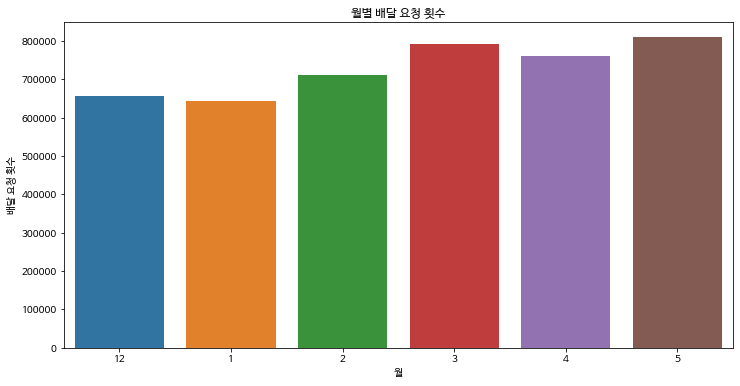

In [ ]:
plt.figure(figsize = (12,6))
plt.title("월별 배달 요청 횟수")
sns.barplot(data=groupedvalues,x='PROCESS_month',y='DLVR_REQUST_STTUS_VALUE',order=[12,1,2,3,4,5])
plt.xlabel('월')
plt.ylabel('배달 요청 횟수')
plt.show()

In [ ]:
dlvr_call["PROCESS_DT"]=pd.to_datetime(dlvr_call["PROCESS_DT"])

In [ ]:
before = delivered[delivered['PROCESS_DT'] < pd.to_datetime('2020-02-18')]
after = delivered[delivered['PROCESS_DT'] > pd.to_datetime('2020-02-18')]

In [ ]:
before

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,DLVR_TOTAL_TIME
0,3486929,2019-12-01,C000101,1,C000101,S0021950,족발/보쌈,1156013200,서울특별시,영등포구,신길동,\N,1156066000,115603000023,1159010800,서울특별시,동작구,대방동,\N,1159066000,115904157098,D0006140,3300,200,18000,1,승인:KB국민카드,2019-12-01 20:47:52,2019-12-01 20:48:11,2019-12-01 20:55:33,2019-12-01 21:00:15,\N,0 days 00:07:41
1,3486930,2019-12-01,C000099,1,C000099,S0039210,치킨,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412854379205,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412853193037,D0005898,2900,0,21900,1,승인:현대카드사,2019-12-01 21:58:07,2019-12-01 22:01:06,2019-12-01 22:20:53,2019-12-01 22:26:01,\N,0 days 00:22:46
2,3486932,2019-12-01,C000029,1,C000043,S0036135,치킨,4115010100,경기도,의정부시,의정부동,\N,4115051000,411504343421,4115011100,경기도,의정부시,녹양동,\N,4115062000,411504343083,D0000864,3500,200,19500,2,NaN,2019-12-01 22:20:31,2019-12-01 22:37:45,2019-12-01 22:58:27,2019-12-01 22:58:32,\N,0 days 00:37:56
3,3486933,2019-12-01,C000105,1,C000105,S0039956,돈까스/일식,4128510400,경기도,고양시 일산동구,장항동,\N,4128559000,412854379097,4128510500,경기도,고양시 일산동구,마두동,\N,4128556000,412854379158,D0001526,3500,0,18000,2,NaN,2019-12-01 21:40:39,2019-12-01 21:48:41,2019-12-01 22:06:35,2019-12-01 22:17:57,\N,0 days 00:25:56
4,3486934,2019-12-01,C000028,1,C000043,S0003074,치킨,4115010900,경기도,의정부시,금오동,\N,4115058000,411504343342,4115010900,경기도,의정부시,금오동,\N,4115058000,411503181019,D0000986,3500,200,18000,3,NaN,2019-12-01 19:44:37,2019-12-01 19:48:07,2019-12-01 19:54:30,2019-12-01 20:00:22,\N,0 days 00:09:53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677798,6163839,2020-02-17,C000029,1,C000043,S0039722,한식,4115010100,경기도,의정부시,의정부동,\N,4115051000,411504343415,4115010100,경기도,의정부시,의정부동,\N,4115051000,411503000136,D0007914,3500,300,27000,1,승인:현대카드사,2020-02-17 23:11:45,2020-02-17 23:15:13,2020-02-17 23:22:22,2020-02-17 23:22:56,\N,0 days 00:10:37
1677799,6163840,2020-02-17,C000109,1,C000109,S0019799,치킨,4139012400,경기도,시흥시,조남동,\N,4139057000,413903350924,4139012400,경기도,시흥시,조남동,\N,4139057000,413903350924,D0007275,3300,300,23000,1,승인:KB국민카드,2020-02-17 23:48:20,2020-02-17 23:51:16,2020-02-17 23:59:37,2020-02-18 00:13:33,\N,0 days 00:11:17
1677800,6163843,2020-02-17,C000249,1,C000249,S0022061,야식,4121010300,경기도,광명시,하안동,\N,4121063100,412104361201,4121010400,경기도,광명시,소하동,\N,4121065000,412103187046,D0006989,4800,400,25000,3,승인:,2020-02-17 23:26:47,2020-02-17 23:50:22,2020-02-17 23:54:42,2020-02-18 00:07:34,\N,0 days 00:27:55
1677801,6163844,2020-02-17,C000109,1,C000109,S0019785,야식,4139012400,경기도,시흥시,조남동,\N,4139057000,413903350922,4139012400,경기도,시흥시,조남동,\N,4139057000,413903350924,D0007279,3300,300,0,2,NaN,2020-02-17 23:31:34,2020-02-17 23:34:48,2020-02-17 23:36:57,2020-02-17 23:37:26,\N,0 days 00:05:23


In [ ]:
f = delivered.groupby(['DLVR_STORE_INDUTY_NM'])['DLVR_TOTAL_TIME'].agg(['count','sum'])
f

,count,sum
DLVR_STORE_INDUTY_NM,,
도시락,45204,818 days 13:38:50
돈까스/일식,222593,2838 days 21:37:08
배달전문업체,82411,899 days 22:25:39
분식,487746,5813 days 05:39:25
심부름,6958,90 days 19:29:55
아시안/양식,103099,1211 days 05:50:58
야식,185848,2463 days 21:13:49
족발/보쌈,361705,4630 days 22:34:27
중식,131467,1727 days 02:19:27


In [ ]:
f["평균 배달시간"]=(f['sum']/f['count']).apply(lambda x: x.total_seconds()/60)

In [ ]:
f["평균 배달시간"]

DLVR_STORE_INDUTY_NM
도시락       26.075985
돈까스/일식    18.365434
배달전문업체    15.724911
분식        17.162743
심부름       18.794182
아시안/양식    16.917632
야식        19.090837
족발/보쌈     18.436445
중식        18.917443
찜탕        17.793301
치킨        18.895435
카페/디저트    21.327114
패스트푸드     16.756176
피자        19.055871
한식        17.574903
회         17.668594
Name: 평균 배달시간, dtype: float64

In [ ]:
f = f.sort_values(by = ['평균 배달시간'])['평균 배달시간']

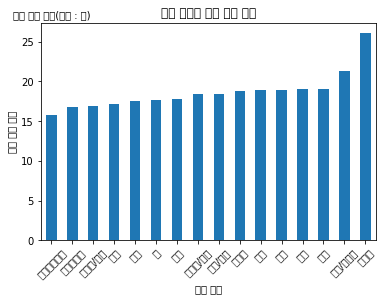

In [ ]:
f.plot.bar()
plt.xticks(rotation = 45)
plt.text(0, 28, '평균 배달 시간(단위 : 분)', ha = 'center')
plt.xlabel('배달 업종')
plt.ylabel('평균 배달 시간')
plt.title('배달 업종별 평균 배달 시간')

plt.show()

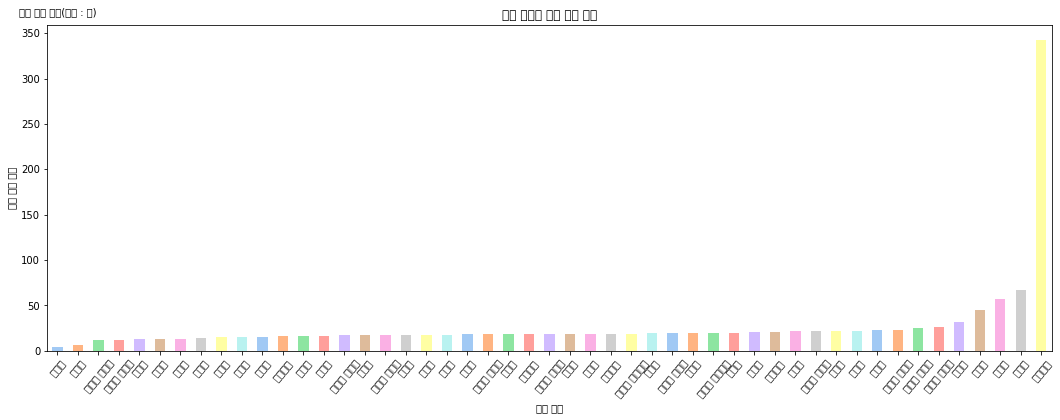

In [ ]:
f = delivered.groupby(['DLVR_STORE_SIGNGU_NM'])['DLVR_TOTAL_TIME'].agg(['count','sum'])
f['평균 배달 시간'] = (f['sum'] / f['count']).apply(lambda x : x.total_seconds() / 60)
f = f.sort_values(by = ['평균 배달 시간'])['평균 배달 시간']

plt.figure(figsize = (18,6))
f.plot.bar(color = sns.color_palette('pastel', f.shape[0]))
plt.xticks(rotation = 50)
plt.text(0, 370, '평균 배달 시간(단위 : 분)', ha = 'center')
plt.xlabel('배달 업종')
plt.ylabel('평균 배달 시간')
plt.title('배달 업종별 평균 배달 시간')

plt.show()

In [ ]:
new_dlvr_call=dlvr_call.set_index('PROCESS_DT')